In [7]:
% matplotlib inline
import pylab as plt
import numpy as np
import networkx as nx
import pandas as pd
import operator
import os
import re
from glob import glob
import os
os.chdir('/home/jagust/dino/surf/')
import util as util
import modularity as md
import scipy

In [9]:
# Functions

def find_id(s):
    inds = re.search('B[0,1]\d-\d\d\d', s)
    if inds is None:
        print 'Subject ID not found'
        return None
    else:
        inds = inds.span()
        return s[inds[0]: inds[1]]

def remove_nan(adj_mat):
    nan_locs = np.isnan(adj_mat)
    adj_mat[nan_locs] = 0.0
    return adj_mat

def isNaN(n):
    return n != n

def to_int(bin_mat):
    return bin_mat.astype(int)

def get_subsess(path):
    direc = "/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/"
    ind1 = len(direc)
    ind2 = ind1 + 18
    return path[ind1:ind2]

def is_geno_pos(ss):
    if len(ss) > 7:
        num_copies = subject_summary[subject_summary.Subsess == ss].values[0][6]
        if num_copies not in [0, 1, 2]:
            print "No genotype data: " + find_id(ss)
            return
        else:
            return num_copies > 0.0
    else:
        num_copies = subject_summary[subject_summary.LBLID == ss].values[0][6]
        if num_copies not in [0, 1, 2]:
            print "No genotype data: " + find_id(ss)
            return
        else:
            return num_copies > 0.0

~ Wednesday 17 June 2015 ~

# Constructing Group-Level Network

In [10]:
# Load Matrices
globstr = "/home/jagust/graph/data/mri1.5/analysis/roi_networks/desikan/adjmat_gsr/*"
mat_paths = sorted(glob(globstr))

<matplotlib.colorbar.Colorbar instance at 0x7f3bffc5c6c8>

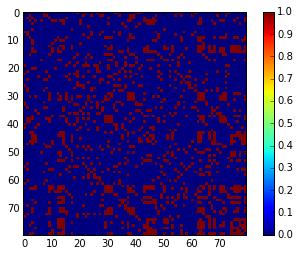

In [11]:
# Showing one matrix - just using this for research update, can delete later
mat = np.load(mat_paths[0])
thr, co = util.threshold_adjacency_matrix(mat, cost = 0.20)

plt.imshow(thr, interpolation = 'nearest')
plt.colorbar()

In [12]:
#Binarize Matrices
thr_mats = []
for path in mat_paths:
    mat = remove_nan(np.load(path))
    thr_mat, act_cost = util.threshold_adjacency_matrix(mat, cost = 0.20)
    thr_mats.append(to_int(thr_mat))

<matplotlib.colorbar.Colorbar instance at 0x7f3bffa342d8>

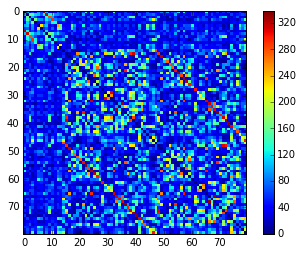

In [13]:
# Aggregate Individual Matrices
group_mat = thr_mats[0]
for mat in thr_mats[1:]:
    group_mat += mat
plt.imshow(group_mat, interpolation = 'nearest')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f3bff8af0e0>

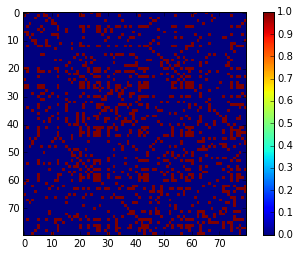

In [14]:
# Threshold Group Matrix
thr_group_mat, actual_cost = util.threshold_adjacency_matrix(mat, cost = 0.20)
plt.imshow(thr_group_mat, interpolation = 'nearest')
plt.colorbar()

In [15]:
#np.save('/home/jagust/dino/github/surf/thr_func_group_mat', thr_group_mat)

In [16]:
# Construct Group Network
group_net = nx.Graph(thr_group_mat)
len(group_net.nodes()), len(group_net.edges())

(80, 632)

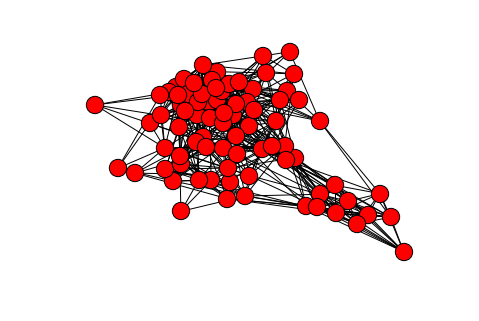

In [17]:
nx.draw(group_net)
plt.show()

# Construct E4 Positive/Negative Sub-Group Level Functional Networks

In [49]:
# Load Subject Information
master_subject_path = "/home/jagust/dino/graph/data/mri1.5/rest/master_subject_summary.xlsx"
subject_summary = pd.ExcelFile(master_subject_path).parse("Sheet1")
subject_summary

,Subsess,LBLID,Birthday,Age,Gender,Edu,E4_Copies,MRI_Magnet,MRI_TR,MRI_Timepoints,MRI_directory,MRI_arda_dir,MRI_date,PIB_bacs_dir,PIB_bacs_date,FDG_bacs_dir,FDG_bacs_date,Cog_dir,Cog_date
0,B05-201_2009-03-27,B05-201,1933-07-14,75,F,20,1,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-201_20...,/home/jagust/arda/lblid/B05-201/MRI_1.5_2009-0...,2009-03-27,/home/jagust/bacs_pet/PIB/old/ecat/B05-201_v1/pib,2009-03-23,/home/jagust/bacs_pet/FDG/old/ecat/B05-201_v1/fdg,2009-03-23,/home/jagust/arda/lblid/B05-201/COG_S2_2009-08...,2009-08-24
1,B05-201_2013-09-17,B05-201,1933-07-14,80,F,20,1,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-201_20...,/home/jagust/arda/lblid/B05-201/MRI3_1.5_2013-...,2013-09-17,/home/jagust/bacs_pet/PIB/old/ecat/B05-201_v2/pib,2013-11-06,/home/jagust/bacs_pet/FDG/old/ecat/B05-201_v2/fdg,2013-11-06,/home/jagust/arda/lblid/B05-201/COG_S4_2013-06...,2013-06-26
2,B05-202_2009-06-09,B05-202,1928-07-28,80,F,17,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-202_20...,/home/jagust/arda/lblid/B05-202/MRI_1.5_2009-0...,2009-06-09,/home/jagust/bacs_pet/PIB/old/ecat/B05-202_v1/pib,2009-06-02,/home/jagust/bacs_pet/FDG/old/ecat/B05-202_v1/fdg,2009-06-02,/home/jagust/arda/lblid/B05-202/COG_S2_2009-07...,2009-07-15
3,B05-202_2012-11-16,B05-202,1928-07-28,84,F,17,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-202_20...,/home/jagust/arda/lblid/B05-202/MRI2_1.5_2012-...,2012-11-16,/home/jagust/bacs_pet/PIB/old/ecat/B05-202_v1/pib,2009-06-02,/home/jagust/bacs_pet/FDG/old/ecat/B05-202_v1/fdg,2009-06-02,/home/jagust/arda/lblid/B05-202/COG_S5_2012-09...,2012-09-12
4,B05-215_2008-10-01,B05-215,1938-06-21,70,F,20,2,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-215_20...,/home/jagust/arda/lblid/B05-215/MRI_1.5_2008-1...,2008-10-01,/home/jagust/bacs_pet/PIB/old/ecat/B05-215_v1/pib,2008-10-06,/home/jagust/bacs_pet/FDG/old/ecat/B05-215_v1/fdg,2008-10-06,/home/jagust/arda/lblid/B05-215/COG_S3_2009-07...,2009-07-09
5,B05-215_2010-09-03,B05-215,1938-06-21,72,F,20,2,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-215_20...,/home/jagust/arda/lblid/B05-215/MRI2_1.5_2010-...,2010-09-03,/home/jagust/bacs_pet/PIB/old/ecat/B05-215_v2/pib,2010-09-09,/home/jagust/bacs_pet/FDG/old/ecat/B05-215_v2/fdg,2010-09-14,/home/jagust/arda/lblid/B05-215/COG_S4_2011-07...,2011-07-26
6,B05-216_2008-10-07,B05-216,1941-09-01,67,F,18,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-216_20...,/home/jagust/arda/lblid/B05-216/MRI_1.5_2008-1...,2008-10-07,/home/jagust/bacs_pet/PIB/old/ecat/B05-216_v1/pib,2008-11-20,/home/jagust/bacs_pet/FDG/old/ecat/B05-216_v1/fdg,2008-10-29,/home/jagust/arda/lblid/B05-216/COG_S3_2009-05...,2009-05-18
7,B05-216_2013-08-20,B05-216,1941-09-01,71,F,18,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-216_20...,/home/jagust/arda/lblid/B05-216/MRI2_1.5_2013-...,2013-08-20,/home/jagust/bacs_pet/PIB/old/ecat/B05-216_v2/pib,2013-08-15,/home/jagust/bacs_pet/FDG/old/ecat/B05-216_v2/fdg,2013-08-15,/home/jagust/arda/lblid/B05-216/COG_S5_2013-06...,2013-06-07
8,B05-217_2009-03-16,B05-217,1937-10-10,71,M,18,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-217_20...,/home/jagust/arda/lblid/B05-217/MRI_1.5_2009-0...,2009-03-16,/home/jagust/bacs_pet/PIB/old/ecat/B05-217_v1/pib,2009-03-18,/home/jagust/bacs_pet/FDG/old/ecat/B05-217_v1/fdg,2009-03-18,/home/jagust/arda/lblid/B05-217/COG_S3_2009-05...,2009-05-07
9,B05-217_2010-03-12,B05-217,1937-10-10,72,M,18,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-217_20...,/home/jagust/arda/lblid/B05-217/MRI2_1.5_2010-...,2010-03-12,/home/jagust/bacs_pet/PIB/old/ecat/B05-217_v1/pib,2009-03-18,/home/jagust/bacs_pet/FDG/old/ecat/B05-217_v1/fdg,2009-03-18,/home/jagust/arda/lblid/B05-217/COG_S3_2009-05...,2009-05-07


In [50]:
subject_summary[subject_summary.LBLID == 'B13-242']

,Subsess,LBLID,Birthday,Age,Gender,Edu,E4_Copies,MRI_Magnet,MRI_TR,MRI_Timepoints,MRI_directory,MRI_arda_dir,MRI_date,PIB_bacs_dir,PIB_bacs_date,FDG_bacs_dir,FDG_bacs_date,Cog_dir,Cog_date
291,B13-242_2013-03-25,B13-242,1989-07-20,23,M,16,NaN,1.5T,2.2,185,/home/jagust/graph/data/mri1.5/rest/B13-242_20...,/home/jagust/arda/lblid/B13-242/MRI_1.5_2013-0...,2013-03-25,NaN,NaN,NaN,NaN,/home/jagust/arda/lblid/B13-242/COG_S1_2013-04...,2013-04-12


In [20]:
# Seperate E4 Negative and E4 Postive Matrices
pos_mats, neg_mats = [], []
for path in mat_paths:
    mat = remove_nan(np.load(path))
    thr_mat, actual_cost = util.threshold_adjacency_matrix(mat, 0.20)
    thr_mat = to_int(thr_mat)
    subsess = get_subsess(path)
    if is_geno_pos(subsess):
        pos_mats.append(thr_mat)
    elif not is_geno_pos(subsess):
        neg_mats.append(thr_mat)

No genotype data: B07-218
No genotype data: B07-218
No genotype data: B07-251
No genotype data: B07-251
No genotype data: B07-267
No genotype data: B07-267
No genotype data: B07-271
No genotype data: B07-271
No genotype data: B07-274
No genotype data: B07-274
No genotype data: B07-275
No genotype data: B07-275
No genotype data: B08-252
No genotype data: B08-252
No genotype data: B08-252
No genotype data: B08-252
No genotype data: B09-206
No genotype data: B09-206
No genotype data: B09-280
No genotype data: B09-280
No genotype data: B10-202
No genotype data: B10-202
No genotype data: B10-215
No genotype data: B10-215
No genotype data: B10-216
No genotype data: B10-216
No genotype data: B10-232
No genotype data: B10-232
No genotype data: B10-257
No genotype data: B10-257
No genotype data: B10-261
No genotype data: B10-261
No genotype data: B10-264
No genotype data: B10-264
No genotype data: B10-294
No genotype data: B10-294
No genotype data: B11-204
No genotype data: B11-204
No genotype 

In [21]:
# Aggregate E4 Positive/Negative Matrices
# Note: Try different thresholds
aggr_pos, aggr_neg = pos_mats[0], neg_mats[0]
for mat in pos_mats[1:]:
    aggr_pos += mat
for mat in neg_mats[1:]:
    aggr_neg += mat

thr_pos, act_cost_pos = util.threshold_adjacency_matrix(aggr_pos, cost = 0.20)
thr_neg, act_cost_neg = util.threshold_adjacency_matrix(aggr_neg, cost = 0.20)

In [22]:
np.save('/home/jagust/dino/github/surf/thr_pos_func_mat.npy', thr_pos)
np.save('/home/jagust/dino/github/surf/thr_neg_func_mat.npy', thr_neg)

<matplotlib.colorbar.Colorbar instance at 0x7f3bff75a5f0>

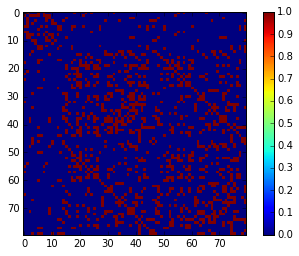

In [23]:
plt.imshow(thr_pos, interpolation = 'nearest')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f3bff31da28>

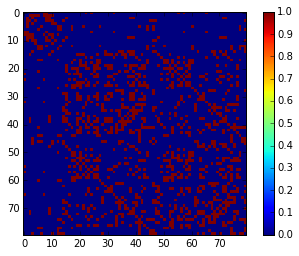

In [24]:
plt.imshow(thr_neg, interpolation = 'nearest')
plt.colorbar()

In [25]:
pos_group_net = nx.Graph(thr_pos)
neg_group_net = nx.Graph(thr_neg)


# Construct Correlation-Based PiB Network

In [26]:
# ASK KATIE WHY THIS METHOD DOESN'T WORK #
pib_path = "/home/jagust/dino/graph/data/spreadsheets/pib/pib_summary_April2015.csv"
pib_summ = pd.read_csv(pib_path)
#pib_summ

In [27]:
# Importing PiB Subject x Roi Data
pib_path = "/home/jagust/dino/graph/data/spreadsheets/pib/pib_summary_April2015.csv"
pib_dat = np.genfromtxt(pib_path, dtype = None)
pib_df = pd.DataFrame(pib_dat[1:], columns = pib_dat[0,:])
pib_df

,SUBID,scanner,ALL,Left-Amygdala,Left-Caudate,Left-Cerebellum-Cortex,Left-Hippocampus,Left-Pallidum,Left-Putamen,Left-Thalamus-Proper,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-temporalpole,ctx-rh-transversetemporal
0,B05-201_v1,ecat,1.273208,1.086826,1.30695,0.914772,1.10575,1.485336,1.520339,1.438444,...,1.261181,1.678135,1.815939,1.585188,1.449524,1.305483,1.19165,1.427792,0.971381,1.427594
1,B05-201_v2,ecat,1.529529,1.262077,1.471517,1.007894,1.250078,1.762007,1.84082,1.644838,...,1.527978,1.896365,1.982312,1.949927,1.694613,1.550804,1.546884,1.80008,1.180847,1.722326
2,B05-202_v1,ecat,1.007444,0.996752,1.009585,0.925908,1.059822,1.432898,1.297446,1.411028,...,1.032836,1.068713,1.126808,0.943386,1.051736,1.005358,0.990789,1.001359,0.866243,1.216935
3,B05-215_v1,ecat,1.30598,1.127267,1.381074,0.942477,1.12963,1.582226,1.656856,1.536823,...,1.236287,1.516453,1.65888,1.654284,1.547849,1.320834,1.278834,1.478342,0.979637,1.422982
4,B05-215_v2,ecat,1.264717,1.147965,1.253538,0.95681,1.092281,1.621212,1.61515,1.485623,...,1.230727,1.265551,1.608417,1.601515,1.397909,1.113494,1.333598,1.406201,1.047203,1.470536
5,B05-216_v1,ecat,0.995555,1.023762,1.157034,0.94195,1.049361,1.231373,1.263895,1.337227,...,1.074021,1.043423,0.866399,0.91353,0.977341,1.025745,0.953268,1.010699,0.778639,0.98168
6,B05-216_v2,ecat,0.997904,1.150004,1.202634,0.945866,1.13584,1.311408,1.310684,1.524631,...,1.036295,0.997476,1.002954,0.933247,0.936901,1.003824,0.96584,0.927819,0.932658,0.983451
7,B05-217_v1,ecat,0.969352,1.028224,0.942836,0.936708,1.043872,1.284137,1.225581,1.307024,...,1.044124,0.999279,0.960506,0.883778,0.939117,0.955872,0.911645,0.93609,0.769666,1.090629
8,B05-217_v2,ecat,0.991589,0.989056,0.947241,1.051914,1.006267,1.297097,1.218044,1.368012,...,1.059234,0.992348,0.996284,0.911932,0.980789,0.997719,0.911317,0.95865,0.821811,1.095473
9,B05-229_v1,ecat,0.9856,0.983856,0.839358,0.882943,1.037109,1.137595,1.157793,0.999583,...,1.021045,1.107521,0.883888,0.968344,0.960292,1.004711,0.942215,0.917178,0.829615,1.04856


In [28]:
# Get PiB Values and Construct Correlation Matrix
pib_vals = pd.DataFrame(np.array(pib_df.values[:, 3:], dtype = float))
corr_mat = np.array(pib_vals.corr())
np.fill_diagonal(corr_mat, 0.0)
corr_mat

array([[ 0.        ,  0.62742124,  0.14107674, ...,  0.54433657,
         0.55844704,  0.56966236],
       [ 0.62742124,  0.        ,  0.14770853, ...,  0.72515725,
         0.55865214,  0.70237077],
       [ 0.14107674,  0.14770853,  0.        , ...,  0.11018073,
         0.25164088,  0.15376092],
       ..., 
       [ 0.54433657,  0.72515725,  0.11018073, ...,  0.        ,
         0.59428415,  0.82330786],
       [ 0.55844704,  0.55865214,  0.25164088, ...,  0.59428415,
         0.        ,  0.60851925],
       [ 0.56966236,  0.70237077,  0.15376092, ...,  0.82330786,
         0.60851925,  0.        ]])

In [29]:
 np.save('/home/jagust/dino/github/surf/pib_mat.npy', corr_mat)

<matplotlib.colorbar.Colorbar instance at 0x7f3bfced6ab8>

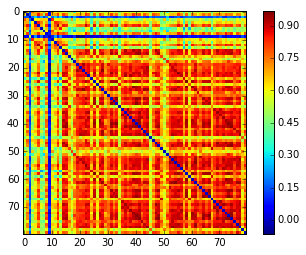

In [30]:
plt.imshow(corr_mat, interpolation = "nearest")
plt.colorbar()

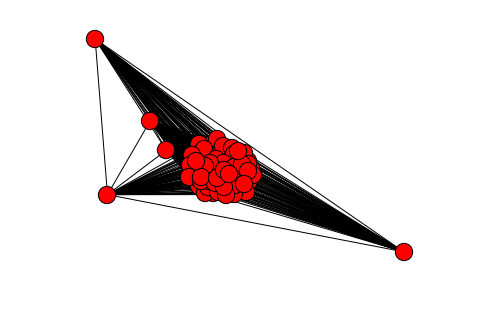

In [31]:
# Create PiB Network from Correlation Matrix (No Threshold)
pib_net = nx.from_numpy_matrix(corr_mat)
nx.draw(pib_net)
plt.show()

<matplotlib.colorbar.Colorbar instance at 0x7f3bfca3a9e0>

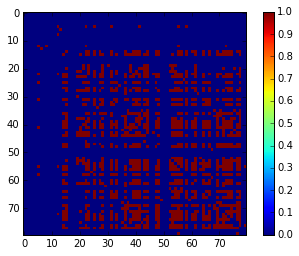

In [32]:
# Create PiB Network from Thresholded Correlation Matrix
thr_corr_mat, act_cost = util.threshold_adjacency_matrix(corr_mat, cost = 0.20)
thr_pib_net = nx.Graph(thr_corr_mat)
plt.imshow(thr_corr_mat, interpolation = 'nearest')
plt.colorbar()

In [35]:
thr_corr_mat.shape
np.save('/home/jagust/dino/github/surf/thr_pib_mat.npy', thr_corr_mat)

In [36]:
print len(thr_pib_net.nodes()), len(thr_pib_net.edges())

80 632


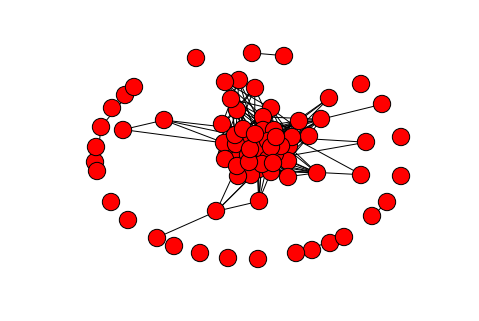

In [37]:
nx.draw(thr_pib_net)
plt.show()

# Construct Correlation Based PiB Networks for E4 Postive/Negative Subgroups

In [38]:
subject_summary

,Subsess,LBLID,Birthday,Age,Gender,Edu,E4_Copies,MRI_Magnet,MRI_TR,MRI_Timepoints,MRI_directory,MRI_arda_dir,MRI_date,PIB_bacs_dir,PIB_bacs_date,FDG_bacs_dir,FDG_bacs_date,Cog_dir,Cog_date
0,B05-201_2009-03-27,B05-201,1933-07-14,75,F,20,1,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-201_20...,/home/jagust/arda/lblid/B05-201/MRI_1.5_2009-0...,2009-03-27,/home/jagust/bacs_pet/PIB/old/ecat/B05-201_v1/pib,2009-03-23,/home/jagust/bacs_pet/FDG/old/ecat/B05-201_v1/fdg,2009-03-23,/home/jagust/arda/lblid/B05-201/COG_S2_2009-08...,2009-08-24
1,B05-201_2013-09-17,B05-201,1933-07-14,80,F,20,1,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-201_20...,/home/jagust/arda/lblid/B05-201/MRI3_1.5_2013-...,2013-09-17,/home/jagust/bacs_pet/PIB/old/ecat/B05-201_v2/pib,2013-11-06,/home/jagust/bacs_pet/FDG/old/ecat/B05-201_v2/fdg,2013-11-06,/home/jagust/arda/lblid/B05-201/COG_S4_2013-06...,2013-06-26
2,B05-202_2009-06-09,B05-202,1928-07-28,80,F,17,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-202_20...,/home/jagust/arda/lblid/B05-202/MRI_1.5_2009-0...,2009-06-09,/home/jagust/bacs_pet/PIB/old/ecat/B05-202_v1/pib,2009-06-02,/home/jagust/bacs_pet/FDG/old/ecat/B05-202_v1/fdg,2009-06-02,/home/jagust/arda/lblid/B05-202/COG_S2_2009-07...,2009-07-15
3,B05-202_2012-11-16,B05-202,1928-07-28,84,F,17,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-202_20...,/home/jagust/arda/lblid/B05-202/MRI2_1.5_2012-...,2012-11-16,/home/jagust/bacs_pet/PIB/old/ecat/B05-202_v1/pib,2009-06-02,/home/jagust/bacs_pet/FDG/old/ecat/B05-202_v1/fdg,2009-06-02,/home/jagust/arda/lblid/B05-202/COG_S5_2012-09...,2012-09-12
4,B05-215_2008-10-01,B05-215,1938-06-21,70,F,20,2,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-215_20...,/home/jagust/arda/lblid/B05-215/MRI_1.5_2008-1...,2008-10-01,/home/jagust/bacs_pet/PIB/old/ecat/B05-215_v1/pib,2008-10-06,/home/jagust/bacs_pet/FDG/old/ecat/B05-215_v1/fdg,2008-10-06,/home/jagust/arda/lblid/B05-215/COG_S3_2009-07...,2009-07-09
5,B05-215_2010-09-03,B05-215,1938-06-21,72,F,20,2,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-215_20...,/home/jagust/arda/lblid/B05-215/MRI2_1.5_2010-...,2010-09-03,/home/jagust/bacs_pet/PIB/old/ecat/B05-215_v2/pib,2010-09-09,/home/jagust/bacs_pet/FDG/old/ecat/B05-215_v2/fdg,2010-09-14,/home/jagust/arda/lblid/B05-215/COG_S4_2011-07...,2011-07-26
6,B05-216_2008-10-07,B05-216,1941-09-01,67,F,18,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-216_20...,/home/jagust/arda/lblid/B05-216/MRI_1.5_2008-1...,2008-10-07,/home/jagust/bacs_pet/PIB/old/ecat/B05-216_v1/pib,2008-11-20,/home/jagust/bacs_pet/FDG/old/ecat/B05-216_v1/fdg,2008-10-29,/home/jagust/arda/lblid/B05-216/COG_S3_2009-05...,2009-05-18
7,B05-216_2013-08-20,B05-216,1941-09-01,71,F,18,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-216_20...,/home/jagust/arda/lblid/B05-216/MRI2_1.5_2013-...,2013-08-20,/home/jagust/bacs_pet/PIB/old/ecat/B05-216_v2/pib,2013-08-15,/home/jagust/bacs_pet/FDG/old/ecat/B05-216_v2/fdg,2013-08-15,/home/jagust/arda/lblid/B05-216/COG_S5_2013-06...,2013-06-07
8,B05-217_2009-03-16,B05-217,1937-10-10,71,M,18,0,1.5T,1.89,250,/home/jagust/graph/data/mri1.5/rest/B05-217_20...,/home/jagust/arda/lblid/B05-217/MRI_1.5_2009-0...,2009-03-16,/home/jagust/bacs_pet/PIB/old/ecat/B05-217_v1/pib,2009-03-18,/home/jagust/bacs_pet/FDG/old/ecat/B05-217_v1/fdg,2009-03-18,/home/jagust/arda/lblid/B05-217/COG_S3_2009-05...,2009-05-07
9,B05-217_2010-03-12,B05-217,1937-10-10,72,M,18,0,1.5T,2.20,185,/home/jagust/graph/data/mri1.5/rest/B05-217_20...,/home/jagust/arda/lblid/B05-217/MRI2_1.5_2010-...,2010-03-12,/home/jagust/bacs_pet/PIB/old/ecat/B05-217_v1/pib,2009-03-18,/home/jagust/bacs_pet/FDG/old/ecat/B05-217_v1/fdg,2009-03-18,/home/jagust/arda/lblid/B05-217/COG_S3_2009-05...,2009-05-07


~ Thursday 18 June 2015 ~

In [39]:
# Seperate E4 Neg and E4 Pos PiB Data
pib_pos_mat, pib_neg_mat = np.zeros(80), np.zeros(80)
for sub_dat in pib_dat[1:, :]:
    sub_data = subject_summary[subject_summary.LBLID == find_id(sub_dat[0])]
    if len(sub_data) == 0:
        print "Not in master subject summary file: " + find_id(sub_dat[0])
        continue
    gen_copies = sub_data.values[0][6]
    if gen_copies < 3 and gen_copies > 0:
        pib_pos_mat = np.vstack((pib_pos_mat, sub_dat[3:]))
    elif gen_copies == 0:
        pib_neg_mat = np.vstack((pib_neg_mat, sub_dat[3:]))
    elif gen_copies not in [0, 1, 2]:
        print "No genotype data: " + find_id(sub_dat[0])
pib_pos_mat = pib_pos_mat[1:,:]
pib_neg_mat = pib_neg_mat[1:,:]

No genotype data: B07-267
No genotype data: B07-271
No genotype data: B10-216
No genotype data: B10-232
No genotype data: B10-257
No genotype data: B10-261
No genotype data: B10-264
No genotype data: B10-294
Not in master subject summary file: B10-295
Not in master subject summary file: B10-299
No genotype data: B11-204
No genotype data: B11-208
No genotype data: B12-230
Not in master subject summary file: B12-294
No genotype data: B12-339
No genotype data: B14-265
No genotype data: B14-285
No genotype data: B14-295


In [40]:
print pib_pos_mat.shape
print pib_neg_mat.shape

(54, 80)
(139, 80)


In [41]:
# Calculate Correlation Matrix for Subgroups
pos_pib_vals = pd.DataFrame(np.array(pib_pos_mat, dtype = float))
pos_corr_mat = np.array(pos_pib_vals.corr())
np.fill_diagonal(pos_corr_mat, 0.0)

neg_pib_vals = pd.DataFrame(np.array(pib_neg_mat, dtype = float))
neg_corr_mat = np.array(neg_pib_vals.corr())
np.fill_diagonal(neg_corr_mat, 0.0)

print pos_corr_mat.shape
print neg_corr_mat.shape

(80, 80)
(80, 80)


In [42]:
#neg_corr_mat
np.save('/home/jagust/dino/github/surf/neg_pib_mat.npy', neg_corr_mat)

In [43]:
#pos_corr_mat
np.save('/home/jagust/dino/github/surf/pos_pib_mat.npy', pos_corr_mat)

<matplotlib.colorbar.Colorbar instance at 0x7f3bfc906f80>

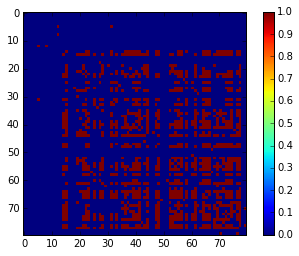

In [44]:
# Create PiB Positive Network from Thresholded Correlation Matrix
thr_pos_corr_mat, act_cost = util.threshold_adjacency_matrix(pos_corr_mat, cost = 0.20)
thr_pos_pib_net = nx.Graph(thr_pos_corr_mat)
plt.imshow(thr_pos_corr_mat, interpolation = 'nearest')
plt.colorbar()

In [45]:
#thr_pos_corr_mat.shape
np.save('/home/jagust/dino/github/surf/thr_pos_pib_mat.npy', thr_pos_corr_mat)

<matplotlib.colorbar.Colorbar instance at 0x7f3bfc74b638>

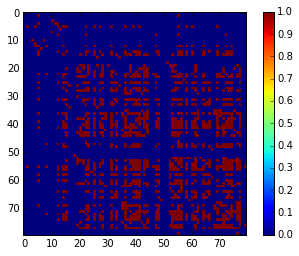

In [46]:
# Create PiB Negative Network from Thresholded Correlation Matrix
thr_neg_corr_mat, act_cost = util.threshold_adjacency_matrix(neg_corr_mat, cost = 0.20)
thr_neg_pib_net = nx.Graph(thr_neg_corr_mat)
plt.imshow(thr_neg_corr_mat, interpolation = 'nearest')
plt.colorbar()

In [47]:
thr_neg_corr_mat.shape

(80, 80)

In [48]:
np.save('/home/jagust/dino/github/surf/thr_neg_pib_mat.npy', thr_neg_corr_mat)

Below are initial trials of lesion simulation. We have now revised how we are going about doing the lesion simulation. Those trials are in lesion_simulation.ipynb. I am keeping the code below for reference as some of the functions that I wrote here might be useful in the future.

~ Friday 19 June 2015 ~

# Lesion Simulation

In [873]:
'''
This method doesn't work because graph might become disconnected
def find_eff(g):
    # Find Average Shortest Path Length
    avg_short = nx.average_shortest_path_length(g)
    return 1.0 / avg_short
'''

def find_eff(g):
    if nx.is_connected(g):
        return 1.0 / nx.average_shortest_path_length(g)
    else:
        short_paths, poss_paths = [], []
        total_paths, avg_short_path = 0, 0
        if len(g.edges()) == 0:
            return 1.0 / sys.float_info.max
        for subg in nx.connected_component_subgraphs(g):
            n = len(subg.nodes())
            if n == 1:
                continue
            num_paths = n * (n - 1) * 1.0 / 2.0
            total_paths += num_paths
            short_paths.append(nx.average_shortest_path_length(subg) * 1.0)
            poss_paths.append(num_paths * 1.0)
        for ind in range(len(short_paths)):
            avg_short_path += short_paths[ind] * (poss_paths[ind] / total_paths)
        return 1.0 / avg_short_path
    
def find_max_deg_node(g):
    degs = g.degree()
    sorted_degs = sorted(degs.items(), key = operator.itemgetter(1))[::-1]
    return sorted_degs[0][0]

In [874]:
matglobstr = "/home/jagust/graph/data/mri1.5/analysis/mod_sampling/spectral_submod/%s_thr0.20_0.5_1000_cmat*.npy" % ('*')
mat_paths = sorted(glob(partglobstr))
partglobstr = "/home/jagust/graph/data/mri1.5/analysis/mod_sampling/spectral_submod/%s_thr0.20_0.5_1000_cpart*.npy" % ('*')
part_paths = sorted(glob(partglobstr))


In [875]:
# thr_pib_net is the group level PiB network
# group_net is the group level functional network

In [876]:
#nx.shortest_path_length(pnet, source = 27)

In [877]:
fnet = group_net.copy()
pnet = thr_pib_net.copy()

In [878]:
# Simulation 1: Iteratively remove nodes that are length 1 away in PiB network from
# from the previously removed node. Start with node that has highest degree in
# PiB network
from random import shuffle
import sys

def run_simulation(fnet, pnet):
    nodes = list(fnet.nodes())
    degs = pnet.degree()
    sorted_degs = sorted(degs.items(), key = operator.itemgetter(1))[::-1]
    mod, eff = [], []
    

    # Remove unconnected nodes
    for node in fnet.nodes():
        if fnet.degree(node) == 0:
            fnet.remove_node(node)

    # Remove the first node
    rem = sorted_degs[0][0]
    fnet.remove_node(rem)
    nodes.remove(rem)
    removed, fringe = [rem], []

    # Add nodes to the fringe
    short_paths = nx.shortest_path_length(pnet, source = rem)
    for n in short_paths:
        if short_paths[n] == 1:
            fringe.append(n)
    pnet.remove_node(rem)

    # Iteratively remove
    while len(fnet.nodes()) and len(fringe):
        if not len(fnet.edges()):
            print "No more edges"
            print "Number of nodes removed: " + str(len(removed))
            break
        #print "Iteration"
        # Find next node to remove
        if len(fringe):
            fringe = list(set(fringe))
            shuffle(fringe)
            rem = fringe.pop()
        else:
            rem = find_max_deg_node(pnet)

        #Remove node from graph
        fnet.remove_node(rem)
        removed.append(rem)
        sp = nx.shortest_path_length(pnet, source = rem)

        # Calculate new metrics
        eff.append(find_eff(fnet))

        # Add nodes to the fringe
        for n in sp:
            if n in removed:
                continue
            if sp[n] == 1:
                fringe.append(n)
        pnet.remove_node(rem)
    return eff

~ Monday 22 June 2015 ~

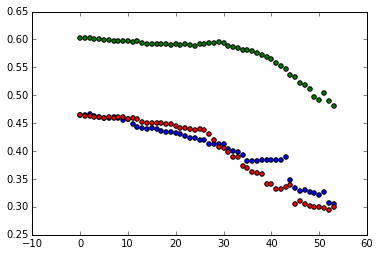

In [885]:
x = range(70)
y = range(0, 1)
fig = plt.figure()
ax = fig.add_subplot(111)

fnet = group_net.copy()
pos_fnet = pos_group_net.copy()
neg_fnet = neg_group_net.copy()
pnet = thr_pib_net.copy()

# Run simulation with E4 Positive Subjects
ypos_list = run_simulation(pos_fnet, pnet)
xpos_list = range(len(ypos_list))
ax.scatter(xpos_list, ypos_list, c = 'b')

pnet = thr_pib_net.copy()
# Run simulation with E4 Negative Subjects
yneg_list = run_simulation(neg_fnet, pnet)
xneg_list = range(len(yneg_list))
ax.scatter(xneg_list, yneg_list, c = 'r')

pnet = thr_pib_net.copy()

# Run simulation with Random network
rand_net = group_net.copy()
rand_mat = nx.to_numpy_matrix(rand_net)
np.random.shuffle(rand_mat)
rand_net = nx.from_numpy_matrix(rand_mat)

y_list_rand = run_simulation(rand_net, pnet)
x_list_rand = range(len(y_list_rand))
ax.scatter(x_list_rand, y_list_rand, c = 'g')

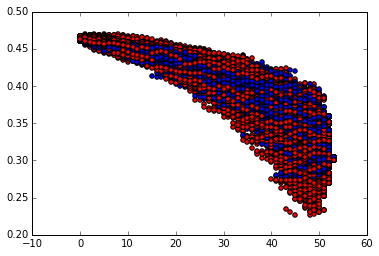

In [886]:
x = range(70)
y = range(0, 1)
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(1000):
    #print "Iteration: " + str(i)
    fnet = group_net.copy()
    pos_fnet = pos_group_net.copy()
    neg_fnet = neg_group_net.copy()
    pnet = thr_pib_net.copy()

    # Run simulation with E4 Positive Subjects
    ypos_list = run_simulation(pos_fnet, pnet)
    xpos_list = range(len(ypos_list))
    ax.scatter(xpos_list, ypos_list, c = 'b')

    pnet = thr_pib_net.copy()
    # Run simulation with E4 Negative Subjects
    yneg_list = run_simulation(neg_fnet, pnet)
    xneg_list = range(len(yneg_list))
    ax.scatter(xneg_list, yneg_list, c = 'r')

    pnet = thr_pib_net.copy()

~ Tuesday 23 June 2015 ~

In [887]:
def find_mod(graph, partf):
    # Load Partition
    part = np.load(partf)
    ind = {}
    for i in range(len(part)):
        ind[i] = set(part[i])
    # Make Partition
    gpart = md.GraphPartition(graph, index=ind)
    return gpart.modularity()

In [892]:
partpaths = '/home/jagust/graph/data/analysis/roi_networks/desikan/results/spectral/cost_0.20/B*partition*.npy'
parts = sorted(glob(partpaths))

In [995]:
# Simulation 1: Iteratively remove nodes that are length 1 away in PiB network from
# from the previously removed node. Start with node that has highest degree in
# PiB network
from random import shuffle
import sys

def run_simulation_mod(fnet, pnet):
    nodes = list(fnet.nodes())
    degs = pnet.degree()
    sorted_degs = sorted(degs.items(), key = operator.itemgetter(1))[::-1]
    mods = []
    
    # Find initial graph partition using spectral
    gpart = md.newman_partition(fnet, max_div=np.inf)
    ind = gpart.index
    mod = gpart.modularity()
    mods.append(mod)

    # Remove unconnected nodes
    for node in fnet.nodes():
        if fnet.degree(node) == 0:
            fnet.remove_node(node)

    # Remove the first node
    rem = sorted_degs[0][0]
    fnet.remove_node(rem)
    nodes.remove(rem)
    removed, fringe = [rem], []

    # Add nodes to the fringe
    short_paths = nx.shortest_path_length(pnet, source = rem)
    for n in short_paths:
        if short_paths[n] == 1:
            fringe.append(n)
    pnet.remove_node(rem)

    # Iteratively remove
    while len(fnet.nodes()) and len(fringe):
        if not len(fnet.edges()):
            print "No more edges"
            print "Number of nodes removed: " + str(len(removed))
            break
        # Find next node to remove
        if len(fringe):
            fringe = list(set(fringe))
            shuffle(fringe)
            rem = fringe.pop()
        else:
            rem = find_max_deg_node(pnet)
        
        #Remove node from graph
        fnet.remove_node(rem)
        removed.append(rem)
        sp = nx.shortest_path_length(pnet, source = rem)
        

        # Calculate new metrics
        new_mod = md.GraphPartition(fnet, index = ind)
        mods.append(new_mod.modularity())

        # Add nodes to the fringe
        for n in sp:
            if n in removed:
                continue
            if sp[n] == 1:
                fringe.append(n)
        pnet.remove_node(rem)
    return mods

In [996]:
m = run_simulation_mod(group_net.copy(), thr_pib_net.copy())

IndexError: index 78 is out of bounds for axis 0 with size 78

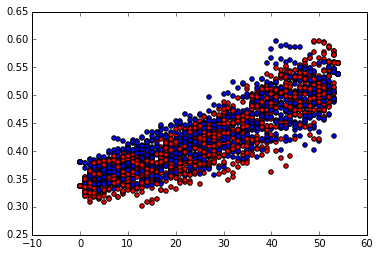

In [994]:
x = range(70)
y = range(0, 1)
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(20):
    res = run_simulation_mod(pos_group_net.copy(), thr_pib_net.copy())
    x_list = range(len(res))
    ax.scatter(xpos_list, res, c = 'b')

    res = run_simulation_mod(neg_group_net.copy(), thr_pib_net.copy())
    x_list = range(len(res))
    ax.scatter(xpos_list, res, c = 'r')
    

Notes:<br/>
======
-Use weighted PiB Network<br/>
-Use a null model<br/>
    >Convert BCT null graph generator to Python<br/>
-Dampening instead of complete removal<br/>
-Think about PiB network

# E4 Positive/Negative Functional Network Property Analysis

In [411]:
regions = pib_df.columns[3:]
regions = [str(reg) for reg in regions]
#regions